# Image Compression

## Importing dependencies

In [1]:
# will be use to handle image processing
import cv2 as cv
import numpy as np
# used to show the results
from matplotlib import pyplot as plt

## Defining used functions

### show an image with the desired width

In [2]:
def show(img, width):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Set desired width and aspect ratio preservation
    desired_width = width  # Adjust this value for your desired width

    # Calculate height based on image aspect ratio and desired width
    img_height, img_width, _ = img_rgb.shape  # Get image height and width
    aspect_ratio = img_height / img_width
    new_height = desired_width * aspect_ratio

    # Create figure with desired width and calculated height
    plt.figure(figsize=(desired_width, new_height))

    # Hide axis and adjust layout for full width
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()

### Show image components

In [3]:
def show_seperate_colors(img, width):
    # get the image components
    b, g, r = cv.split(img)
    # create a blank matrix
    blank = np.zeros(img.shape[:2], dtype='uint8')
    # create the three image components
    blue = cv.merge([b, blank, blank])
    green = cv.merge([blank, g, blank])
    red = cv.merge([blank, blank, r])
    # convert the colors to use pyplot
    blue_rgb = cv.cvtColor(blue, cv.COLOR_BGR2RGB)
    green_rgb = cv.cvtColor(green, cv.COLOR_BGR2RGB)
    red_rgb = cv.cvtColor(red, cv.COLOR_BGR2RGB)
    # Set desired width and aspect ratio preservation
    desired_width = width  # Adjust this value for your desired width

    # Calculate height based on image aspect ratio and desired width
    img_height, img_width, _ = blue_rgb.shape  # Get image height and width
    aspect_ratio = img_height / img_width
    new_height = desired_width * aspect_ratio
    
    fig, axes = plt.subplots(1, 3, figsize=(desired_width, new_height))

    # Display each image on a separate subplot
    axes[0].imshow(blue_rgb)
    axes[0].axis('off')  # Hide axes for cleaner presentation (optional)

    axes[1].imshow(green_rgb)
    axes[1].axis('off')  # Hide axes for cleaner presentation (optional)

    axes[2].imshow(red_rgb)
    axes[2].axis('off')  # Hide axes for cleaner presentation (optional)

    # Display the images
    plt.show()

### The main compressing function


In [4]:
def compress(img, m):
#     img_float32 = np.float32(img)
    b, g, r = cv.split(img)
    compressed_image_components_compress = _compress_components([b, g, r], m)
    compressed_image_compress = cv.merge(compressed_image_components_compress)
    return compressed_image_compress

### Compress color components of the image

In [5]:
def _compress_components(comp_arr, m):
    filtered_array = []
    for comp in comp_arr:
        filtered_array.append(_compress_single_component(comp, m))
    return filtered_array

### Compress a single image component

In [6]:
def _compress_single_component(org_comp, m):
    comp = org_comp.copy()
    rows, columns = comp.shape
    rows_matrices, columns_matrices = int(rows/8), int(columns/8)
    for i in range(0, rows_matrices):
        for j in range(0, columns_matrices):
            small_matrix = comp[i*8:(i+1)*8, j*8:(j+1)*8]
            comp[i*8:(i+1)*8, j*8:(j+1)*8] = filter_frequencies(small_matrix, m)
    return comp

### Take 8\*8 matrix and give the resulted m\*m 

In [7]:
def filter_frequencies(matrix, m):
    matrix_float32 = np.float32(matrix)
    transformed = cv.dct(matrix_float32)
    ones = np.ones(matrix.shape)
    ones = ones * 0.1
    ones[0:m, 0:m] = transformed[0:m, 0:m]
    filtered = cv.idct(ones)
    filtered_uint8 = np.uint8(filtered)
    return filtered

### Statistics functions

In [8]:
def psnr(original_image, compressed_image, max_val=255.0):
    mse_per_channel = mse(original_image, compressed_image)
    psnr_per_channel = 10 * np.log10(max_val**2 / np.array(mse_per_channel))
    return np.mean(psnr_per_channel)

In [9]:
def mse(matrix1, matrix2):
    mse_per_channel = np.mean((matrix1 - matrix2)**2, axis=(0, 1))
    return mse_per_channel.tolist()  # Convert to list for easier handling

## Carrying Tests

In [10]:
path = "./imgs/image1.png"
img = cv.imread(path)
psnr_array = []

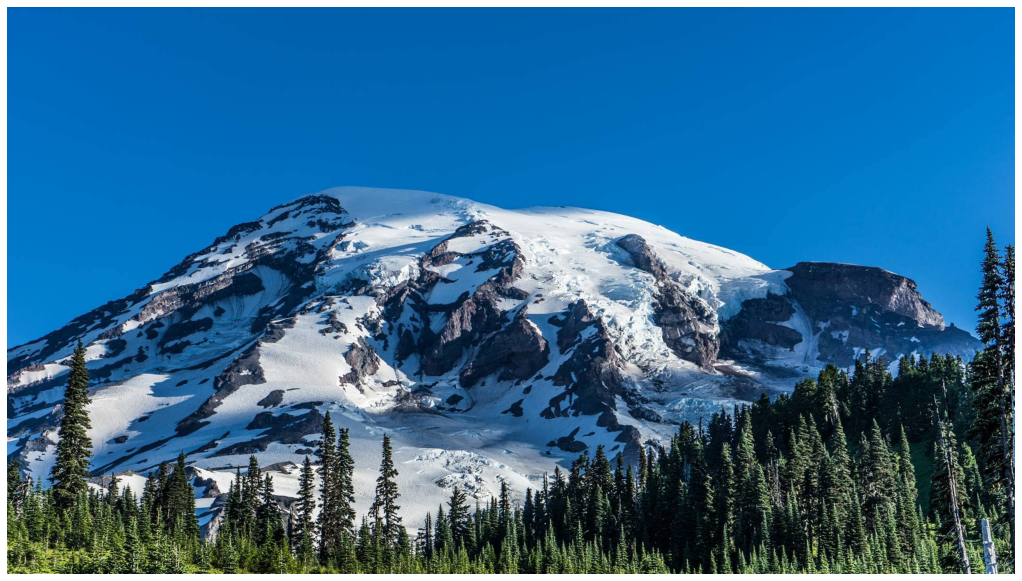

In [11]:
show(img, 14)

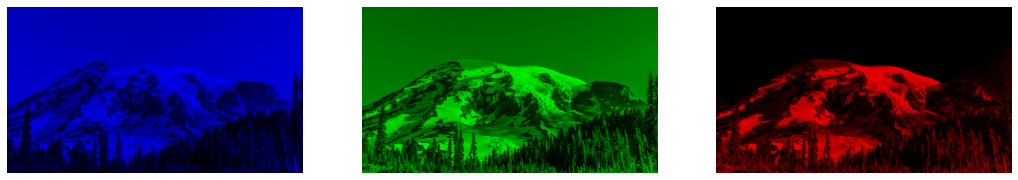

In [12]:
show_seperate_colors(img, 18)

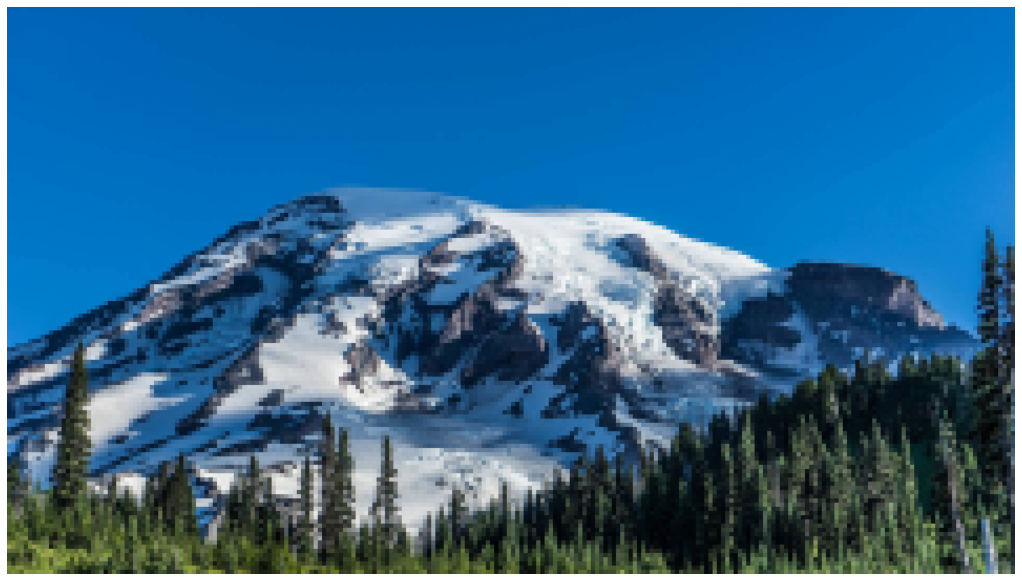

In [13]:
result1 = compress(img, 1)
cv.imwrite("./imgs/image_r1.png", result1)
psnr_array.append(psnr(img, result1))
show(result1, 14)

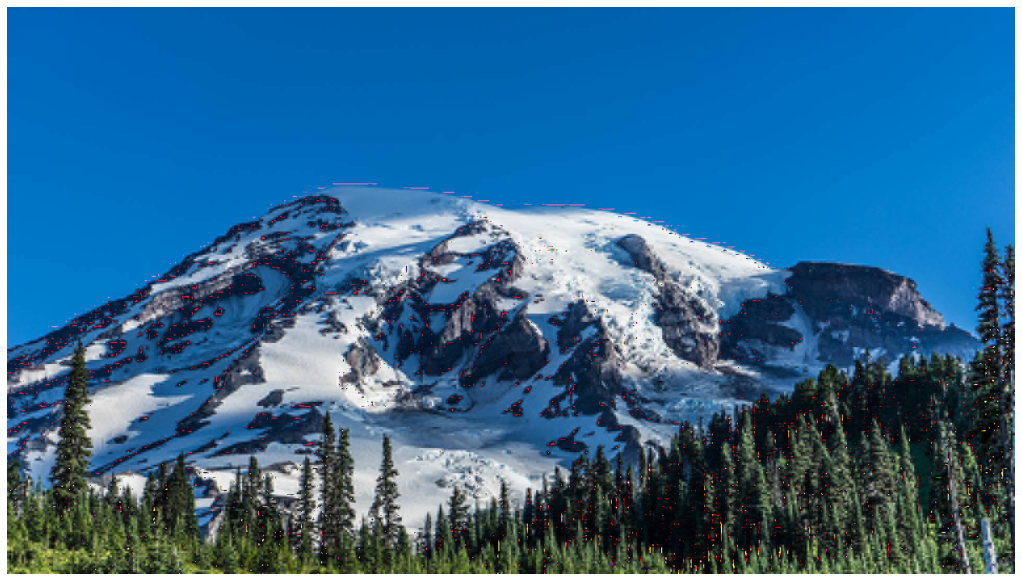

In [14]:
result2 = compress(img, 2)
cv.imwrite("./imgs/image_r2.png", result2)
psnr_array.append(psnr(img, result2))
show(result2, 14)

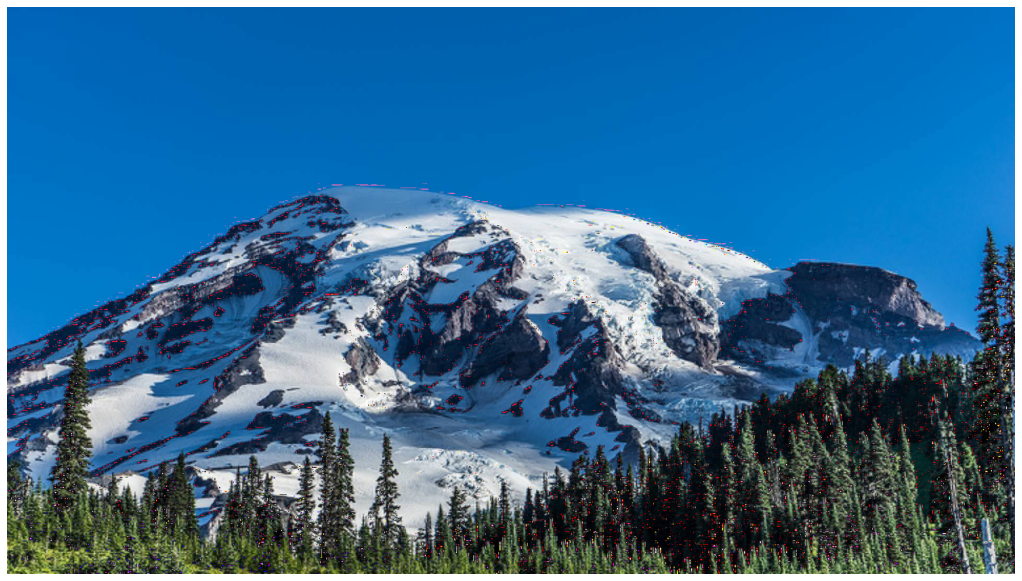

In [15]:
result2 = compress(img, 3)
cv.imwrite("./imgs/image_r3.png", result2)
psnr_array.append(psnr(img, result2))
show(result2, 14)

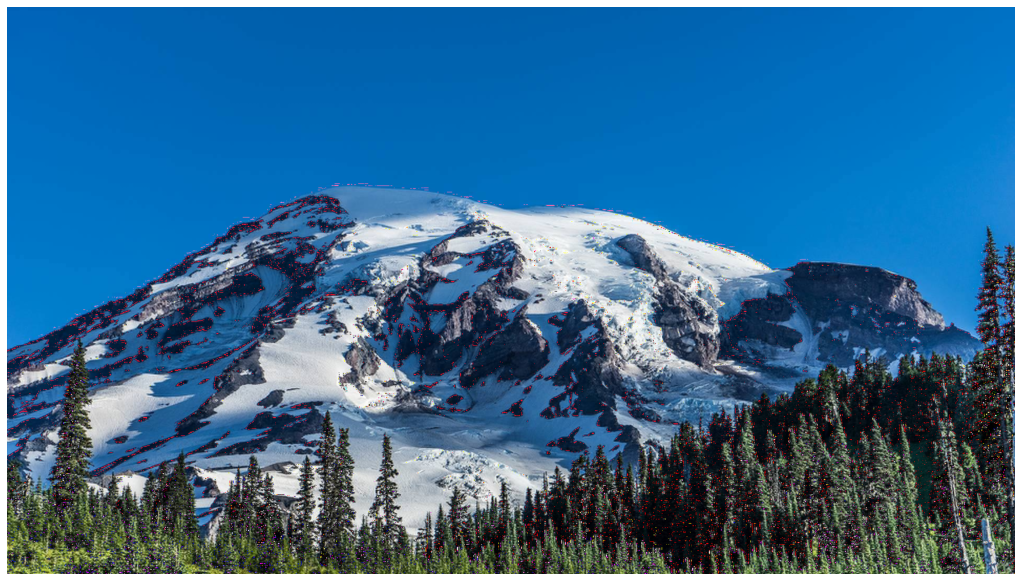

In [16]:
result2 = compress(img, 4)
cv.imwrite("./imgs/image_r4.png", result2)
psnr_array.append(psnr(img, result2))
show(result2, 14)

## PSNR graph

In [17]:
y = np.array(psnr_array)
x = np.array([1,2,3,4])

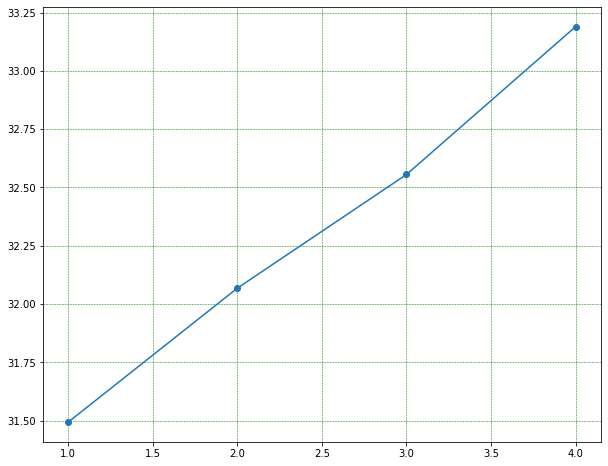

In [18]:
plt.figure(figsize=(10,8))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.plot(x,y, marker= 'o')
plt.show()

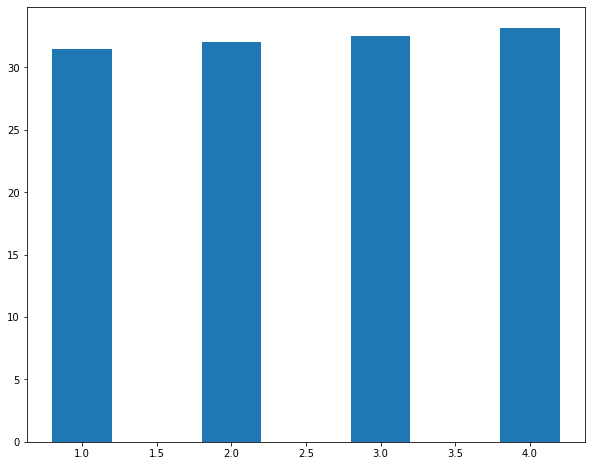

In [19]:
plt.figure(figsize=(10,8))
plt.bar(x,y, width=0.4)

plt.show()